# Employees- Absenteeism

In [1]:
# Loading required libraries
import os
import pandas as pd 
import numpy as np
from fancyimpute import KNN
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
print("Libraries loaded!!")

Using TensorFlow backend.


Libraries loaded!!


In [4]:
# Set working Directory
os.chdir("C:/Users/Shivam/Desktop/Data Science edWisor/PROJECT/python")

# Loading Dataset
dataset = pd.read_excel("Absenteeism_at_work_Project.xls")
dataset.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [5]:
print("The shape of dataset is {}".format(dataset.shape))

The shape of dataset is (740, 21)


In [6]:
dataset.columns = dataset.columns.str.replace(" ","_")
dataset.columns = dataset.columns.str.replace("/","_")
print(dataset.columns)

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average_day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')


## Missing Value Analysis

In [7]:
## Missing Value Analysis
missing_val = pd.DataFrame(dataset.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns  = {'index' : 'variables' , 0 : 'missing_percentage' })
missing_val["missing_percentage"] =  (missing_val["missing_percentage"] / len(dataset))*100
missing_val = missing_val.sort_values('missing_percentage', ascending= False).reset_index(drop = True)
missing_val

,variables,missing_percentage
0,Body_mass_index,4.189189
1,Absenteeism_time_in_hours,2.972973
2,Height,1.891892
3,Work_load_Average_day_,1.351351
4,Education,1.351351
5,Transportation_expense,0.945946
6,Son,0.810811
7,Disciplinary_failure,0.810811
8,Hit_target,0.810811
9,Social_smoker,0.540541


In [8]:
# Droping observation in which "Absenteeism time in hours" has missing value
dataset.dropna(axis=0,how='any',subset=['Absenteeism_time_in_hours'],inplace=True)
print("The shape of dataset after dropping observation is:{}".format(dataset.shape))

The shape of dataset after dropping observation is:(718, 21)


In [11]:
#Actual Value
#dataset.iloc[0,19] = 30.0
#KNN Value = 29.87

## Applying KNN Imputation 
dataset = pd.DataFrame(KNN(k = 3).fit_transform(dataset), columns = dataset.columns)

Imputing row 1/718 with 1 missing, elapsed time: 0.310
Imputing row 101/718 with 1 missing, elapsed time: 0.349
Imputing row 201/718 with 0 missing, elapsed time: 0.351
Imputing row 301/718 with 0 missing, elapsed time: 0.354
Imputing row 401/718 with 0 missing, elapsed time: 0.355
Imputing row 501/718 with 1 missing, elapsed time: 0.357
Imputing row 601/718 with 0 missing, elapsed time: 0.359
Imputing row 701/718 with 0 missing, elapsed time: 0.360


In [14]:
for i in dataset.columns:
    dataset[i] = dataset[i].round()

In [15]:
print(dataset.isnull().sum())

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average_day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64


In [16]:
## Convert into categorical values
cat_var = ['ID','Reason_for_absence','Month_of_absence','Day_of_the_week','Seasons','Disciplinary_failure','Education',
           'Social_drinker','Social_smoker']

for i in cat_var:
    dataset[i] = dataset[i].astype("category")

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 21 columns):
ID                                 718 non-null category
Reason_for_absence                 718 non-null category
Month_of_absence                   718 non-null category
Day_of_the_week                    718 non-null category
Seasons                            718 non-null category
Transportation_expense             718 non-null float64
Distance_from_Residence_to_Work    718 non-null float64
Service_time                       718 non-null float64
Age                                718 non-null float64
Work_load_Average_day_             718 non-null float64
Hit_target                         718 non-null float64
Disciplinary_failure               718 non-null category
Education                          718 non-null category
Son                                718 non-null float64
Social_drinker                     718 non-null category
Social_smoker                      718 non-null

In [20]:
num_var = ['Transportation_expense','Distance_from_Residence_to_Work','Service_time','Age','Work_load_Average_day_',
          'Hit_target','Weight','Height','Body_mass_index','Son','Pet']

## Outliers Analysis

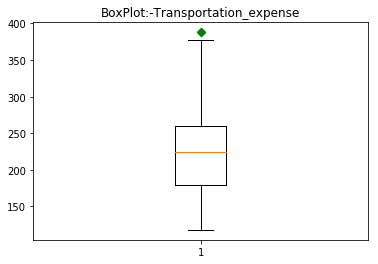

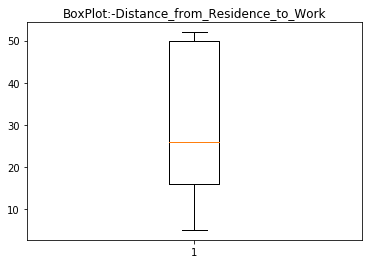

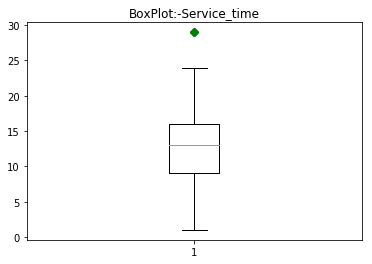

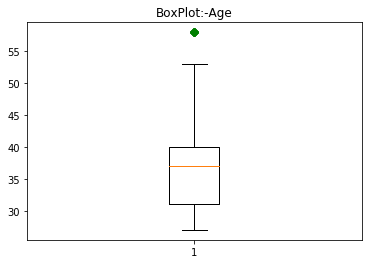

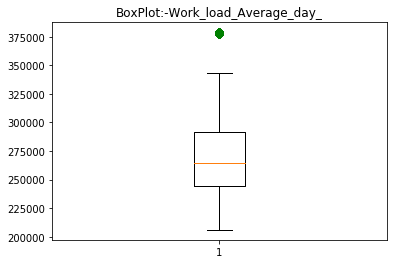

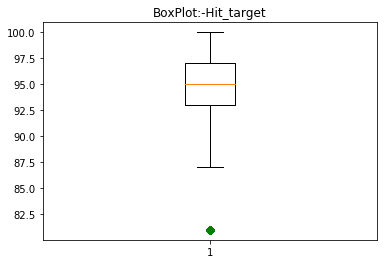

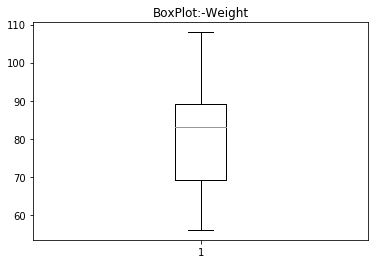

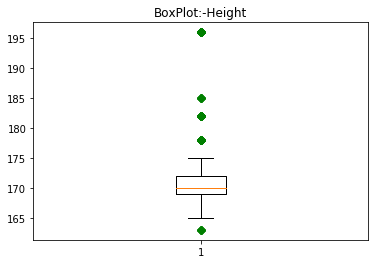

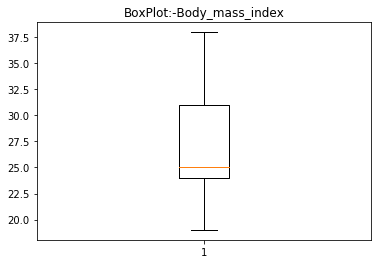

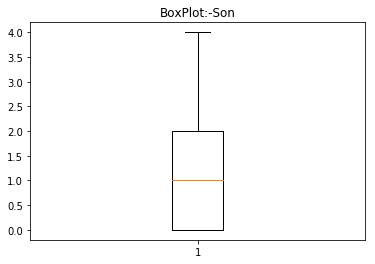

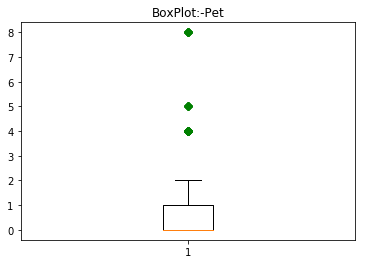

In [21]:
## Outlier Analysis 
for i in num_var:
    plt.boxplot(dataset[i],0,'gD')
    plt.title("BoxPlot:-" + str(i))
    plt.show()

In [22]:
not_outliers= ['Body_mass_index','Weight','Distance_from_Residence_to_Work','Son']
for i in num_var:
    if i in not_outliers:
        continue
    q75,q25 = np.percentile(dataset.loc[:,i],[75,25])
    # Calculating Interquartile range
    iqr = (q75 - q25)
    # Calculating upper extrema and lower extrema
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replace with NA
    dataset.loc[dataset[i] < minimum,i] = np.nan
    dataset.loc[dataset[i] > maximum,i] = np.nan
    

In [23]:
## KNN Imputation
dataset = pd.DataFrame(KNN(k = 3).fit_transform(dataset), columns = dataset.columns)


Imputing row 1/718 with 0 missing, elapsed time: 0.162
Imputing row 101/718 with 0 missing, elapsed time: 0.164
Imputing row 201/718 with 1 missing, elapsed time: 0.165
Imputing row 301/718 with 0 missing, elapsed time: 0.168
Imputing row 401/718 with 0 missing, elapsed time: 0.169
Imputing row 501/718 with 0 missing, elapsed time: 0.170
Imputing row 601/718 with 1 missing, elapsed time: 0.172
Imputing row 701/718 with 0 missing, elapsed time: 0.174


In [24]:
for i in dataset.columns:
    dataset[i] = dataset[i].round()

## Feature Selection of Continuous Variable

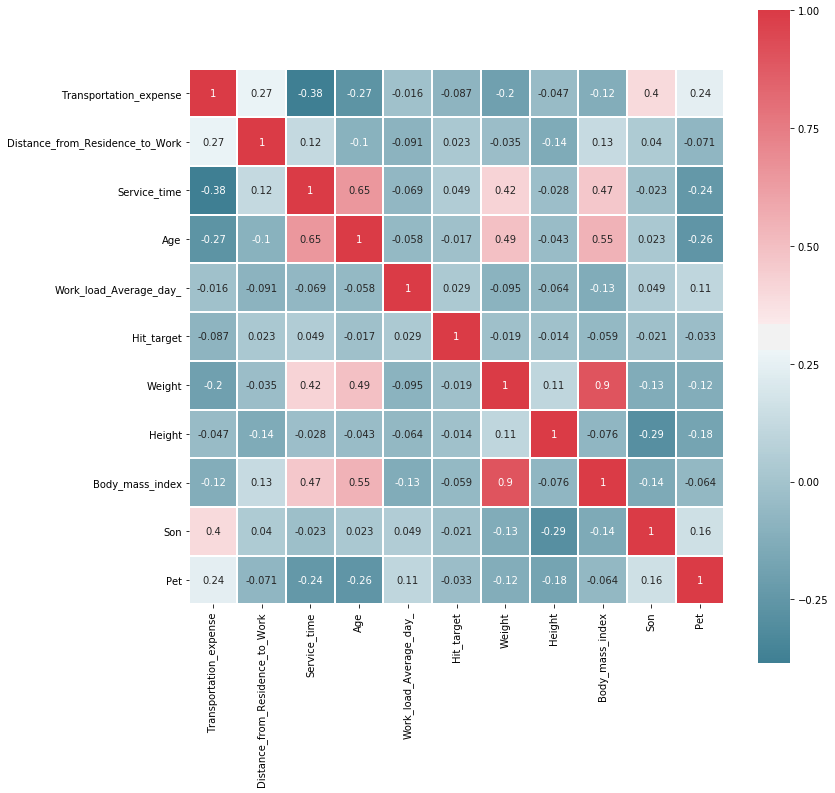

In [26]:
## feature selection for numerical variable
#let us see the correlation

data_corr=dataset.loc[:,num_var]

# Correlation matrix

#generating correlation matrix
corr=data_corr.corr()

#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(12,12)) 

## Plot heatmap using Seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True,linewidths=1)

## Feature Selection of Categorical Variables

In [ ]:
## Anova test
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [31]:
formula = 'Absenteeism_time_in_hours ~ Seasons+Month_of_absence+Social_drinker+Reason_for_absence+Day_of_the_week+Disciplinary_failure+Education+Social_smoker '

In [32]:
model = ols(formula, data=dataset).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Seasons,0.605689,1.0,0.003654,9.518160e-01
Month_of_absence,46.330299,1.0,0.279496,5.971970e-01
Social_drinker,883.489078,1.0,5.329816,2.125037e-02
Reason_for_absence,9210.794529,1.0,55.565868,2.641196e-13
Day_of_the_week,906.673436,1.0,5.469680,1.962609e-02
Disciplinary_failure,4932.016177,1.0,29.753325,6.783889e-08
Education,121.682941,1.0,0.734075,3.918548e-01
Social_smoker,255.650456,1.0,1.542260,2.146924e-01
Residual,117526.343920,709.0,NaN,NaN


In [33]:
dataset.drop(['Weight','Seasons','Month_of_absence','Social_smoker','Education','Day_of_the_week'],axis=1,inplace=True)
## updating the variables
drop_variable = ['Weight','Seasons','Month_of_absence','Social_smoker','Education','Day_of_the_week']
num_var = [i for i in num_var if i not in drop_variable]
cat_var = [i for i in cat_var if i not in drop_variable]

## Feature Scaling

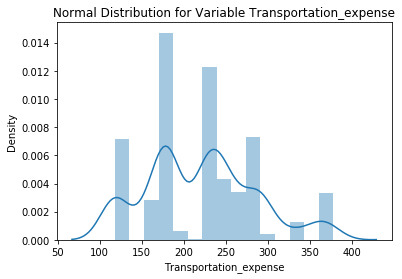

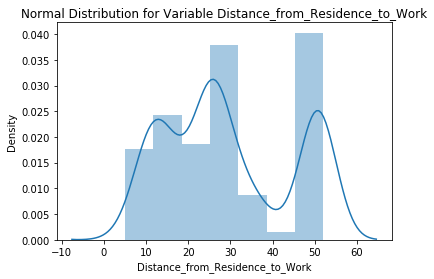

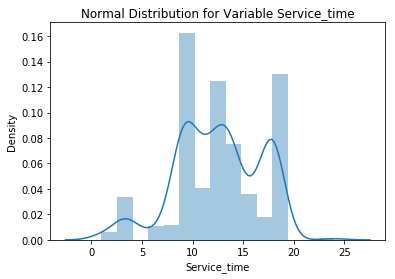

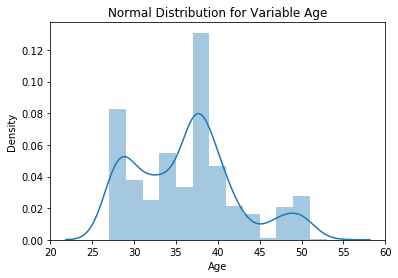

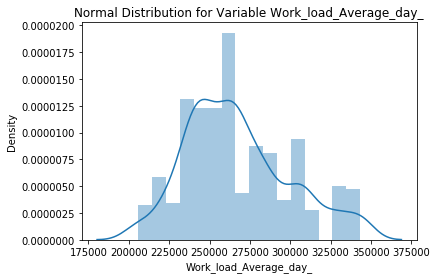

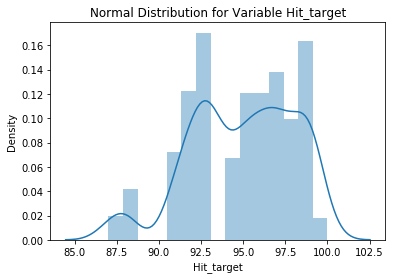

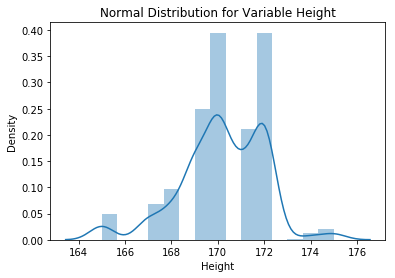

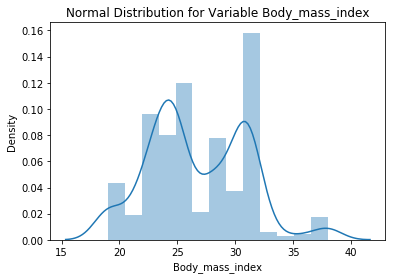

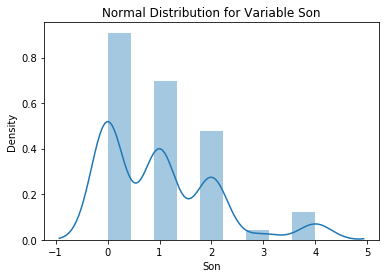

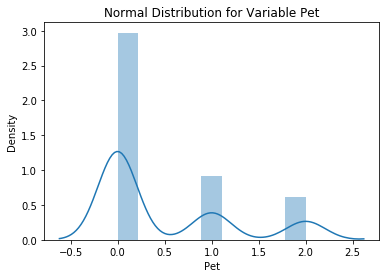

In [35]:
## First check variable is normally distributed or not.
for i in num_var:
    sns.distplot(dataset[i])
    plt.title("Normal Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [36]:
# Since there is no normally distributed curve we will use Normalizationg for Feature Scalling
# #Normalization
for i in num_var:
    dataset[i] = (dataset[i] -min(dataset[i])) / (max(dataset[i]) - min(dataset[i]))
    
## Scaling of target variable
dataset["Absenteeism_time_in_hours"] = (dataset["Absenteeism_time_in_hours"] -min(dataset["Absenteeism_time_in_hours"])) / (max(dataset["Absenteeism_time_in_hours"]) - min(dataset["Absenteeism_time_in_hours"]))

In [37]:
dataset.head()

,ID,Reason_for_absence,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day_,Hit_target,Disciplinary_failure,Son,Social_drinker,Pet,Height,Body_mass_index,Absenteeism_time_in_hours
0,11.0,26.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,0.50,1.0,0.5,0.7,0.578947,0.033333
1,36.0,0.0,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,1.0,0.25,1.0,0.0,0.5,0.631579,0.000000
2,3.0,23.0,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.0,0.00,1.0,0.0,0.5,0.631579,0.016667
3,7.0,7.0,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.0,0.50,1.0,0.0,0.3,0.263158,0.033333
4,11.0,23.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,0.50,1.0,0.5,0.7,0.578947,0.016667


In [42]:
dataset.columns

Index(['ID', 'Reason_for_absence', 'Transportation_expense',
       'Distance_from_Residence_to_Work', 'Service_time', 'Age',
       'Work_load_Average_day_', 'Hit_target', 'Disciplinary_failure', 'Son',
       'Social_drinker', 'Pet', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

### Sampling

In [48]:
X = dataset.iloc[:,:14].values
Y = dataset.iloc[:,14].values

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)
print("The shape of training data is {}".format(x_train.shape))
print("The shape of testing data is {}".format(x_test.shape))

The shape of training data is (574, 14)
The shape of testing data is (144, 14)


### Decision Tree Regression

In [49]:
def DT(depth):
    dt = DecisionTreeRegressor(max_depth = depth,random_state = 42)
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    print("depth : {} --- Decision Tree RMSE : {}".format(depth,sqrt(mean_squared_error(y_test,pred))))

In [50]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,None]:
    DT(i)

depth : 1 --- Decision Tree RMSE : 0.10140833228255668
depth : 2 --- Decision Tree RMSE : 0.10660210780236418
depth : 3 --- Decision Tree RMSE : 0.11201594232298533
depth : 4 --- Decision Tree RMSE : 0.11617625655109245
depth : 5 --- Decision Tree RMSE : 0.13076807432263718
depth : 6 --- Decision Tree RMSE : 0.14270523443704938
depth : 7 --- Decision Tree RMSE : 0.1445617374837007
depth : 8 --- Decision Tree RMSE : 0.16426593854512528
depth : 9 --- Decision Tree RMSE : 0.16752323142895972
depth : 10 --- Decision Tree RMSE : 0.16557776466907667
depth : 11 --- Decision Tree RMSE : 0.17078158817540742
depth : 12 --- Decision Tree RMSE : 0.16953439954954566
depth : 13 --- Decision Tree RMSE : 0.16720581906723295
depth : 14 --- Decision Tree RMSE : 0.17064719523093452
depth : 15 --- Decision Tree RMSE : 0.1705678890434656
depth : None --- Decision Tree RMSE : 0.1682424331300302


In [51]:
dt_model = DecisionTreeRegressor(max_depth=1, random_state=42)
dt_model.fit(x_train,y_train)
dt_pred = dt_model.predict(x_test)
print("Decision Tree RMSE: {} ".format(sqrt(mean_squared_error(y_test,dt_pred))))

Decision Tree RMSE: 0.10140833228255668 


## Random Forest

In [55]:
def RFR(n_est,depth):
    rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth, n_jobs=-1,random_state=42)
    rf.fit(x_train,y_train)
    rf_pred = rf.predict(x_test)
    print(" depth - {} -- n_estimators - {} RMSE : {}".format(n_est,depth,sqrt(mean_squared_error(y_test,rf_pred))))

In [57]:
for n_est in [100, 200, 500, 1000, 2000]:
    for depth in [2, 5, 10 , 20, 30]:
        RFR(n_est, depth)

 depth - 100 -- n_estimators - 2 RMSE : 0.10106265300370718
 depth - 100 -- n_estimators - 5 RMSE : 0.11047466147072077
 depth - 100 -- n_estimators - 10 RMSE : 0.12613657311829224
 depth - 100 -- n_estimators - 20 RMSE : 0.12692281702216968
 depth - 100 -- n_estimators - 30 RMSE : 0.1269279338107296
 depth - 200 -- n_estimators - 2 RMSE : 0.10150270325617834
 depth - 200 -- n_estimators - 5 RMSE : 0.10926873824114933
 depth - 200 -- n_estimators - 10 RMSE : 0.12544705658825625
 depth - 200 -- n_estimators - 20 RMSE : 0.1255944517138384
 depth - 200 -- n_estimators - 30 RMSE : 0.125596029342351
 depth - 500 -- n_estimators - 2 RMSE : 0.1016530323242152
 depth - 500 -- n_estimators - 5 RMSE : 0.11048472100987634
 depth - 500 -- n_estimators - 10 RMSE : 0.12467520879953707
 depth - 500 -- n_estimators - 20 RMSE : 0.12532740831354458
 depth - 500 -- n_estimators - 30 RMSE : 0.125329394905608
 depth - 1000 -- n_estimators - 2 RMSE : 0.10154436331173142
 depth - 1000 -- n_estimators - 5 RMS

In [69]:
rf = RandomForestRegressor(n_estimators =2, max_depth =100,n_jobs=-1)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
print("Random_Forest_Regression RMSE: {}".format(sqrt(mean_squared_error(y_test,rf_pred))))

Random_Forest_Regression RMSE: 0.1575642412446915


In [70]:
df_model = pd.DataFrame({"Model":['Decision Tree Regression','Random Forest Regression'],"RMSE":[0.1014,0.10106]})
df_model

,Model,RMSE
0,Decision Tree Regression,0.10140
1,Random Forest Regression,0.10106


Looking at the above comparsion we can xay both Decision Tree or Random Forest is suitable model as Root mean square error is nearly equal.

## Loss to the company per month

We use the formula :

Loss = ( Average work load per day * Absenteesim Time In Hours ) / Service Time

In [73]:
df2 = pd.read_excel("Absenteeism_at_work_Project.xls")
df2 = df2[['Month of absence','Service time','Work load Average/day ','Absenteeism time in hours']]
df2.dropna(axis=0,how='any',subset=['Absenteeism time in hours'],inplace=True)

In [74]:
## Applying KNN Imputation 
df2 = pd.DataFrame(KNN(k = 3).fit_transform(df2), columns = df2.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.164
Imputing row 101/718 with 0 missing, elapsed time: 0.169
Imputing row 201/718 with 0 missing, elapsed time: 0.171
Imputing row 301/718 with 0 missing, elapsed time: 0.172
Imputing row 401/718 with 0 missing, elapsed time: 0.173
Imputing row 501/718 with 0 missing, elapsed time: 0.174
Imputing row 601/718 with 0 missing, elapsed time: 0.175
Imputing row 701/718 with 0 missing, elapsed time: 0.176


In [75]:
df2['Loss'] = (df2['Work load Average/day '] * df2['Absenteeism time in hours']) / df2['Service time']
df2["Loss"] = np.round(df2["Loss"]).astype('int64')

In [76]:
No_absent = df2[df2['Month of absence'] == 0]['Loss'].sum()
January = df2[df2['Month of absence'] == 1]['Loss'].sum()
February = df2[df2['Month of absence'] == 2]['Loss'].sum()
March = df2[df2['Month of absence'] == 3]['Loss'].sum()
April = df2[df2['Month of absence'] == 4]['Loss'].sum()
May = df2[df2['Month of absence'] == 5]['Loss'].sum()
June = df2[df2['Month of absence'] == 6]['Loss'].sum()
July = df2[df2['Month of absence'] == 7]['Loss'].sum()
August = df2[df2['Month of absence'] == 8]['Loss'].sum()
September = df2[df2['Month of absence'] == 9]['Loss'].sum()
October = df2[df2['Month of absence'] == 10]['Loss'].sum()
November = df2[df2['Month of absence'] == 11]['Loss'].sum()
December = df2[df2['Month of absence'] == 12]['Loss'].sum()

In [77]:
data_Loss = {'No Absent': No_absent, 'Janaury': January,'Febraury': February,'March': March,
       'April': April, 'May': May,'June': June,'July': July,
       'August': August,'September': September,'October': October,'November': November,
       'December': December}
WorkLoss = pd.DataFrame.from_dict(data_Loss, orient='index')
WorkLoss.rename(index=str, columns={0: "Work_Load_Loss/Month"})

,Work_Load_Loss/Month
No Absent,0
Janaury,6367727
Febraury,8268542
March,15707449
April,10999489
May,9326392
June,14362241
July,19015383
August,8791557
September,6482816


Looking at the above results, we can observe that most likely,the company would incur most of loss in the month of 'July', followed by 'March' and 'june'.